![](images/2021-05-25-highway-traffic.jpg){fig-align="center"}

<center><a href = "https://unsplash.com/photos/Xbh_OGLRfUM">Unsplash | Alexander Popov</a></center>

# Overview

Interstate 94 or I-94 is a [highway in the USA](https://midamericafreight.org/index.php/rfs/network-inventory/corridors/profiles/i-94/) that stretches from Montana in the west to Michigan in the east. In 2019, John Hogue donated a dataset of traffic volume, weather, and holiday data on I-94 from 2012 to 2018. This can be found on the following UCI Machine Learning Repository page: [Metro Interstate Traffic Volume Data Set](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of this project is to determine possible indicators of heavy traffic on I-94. Exploratory data analysis will be conducted with Seaborn visualizations.

:::{.callout-note}

I wrote this notebook for the [Dataquest](https://www.dataquest.io/) course's [Guided Project: Finding Heavy Traffic Indicators on I-94](https://app.dataquest.io/m/524/guided-project%3A-finding-heavy-traffic-indicators-on-i-94/10/next-steps). The general project flow and research questions came from Dataquest. However, all of the text and code here are written by me unless stated otherwise.

:::

# Package Installs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

The following details about the I-94 dataset are stated in the [archive](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

- `holiday`: Categorical; US National holidays plus regional holiday, Minnesota State Fair
- `temp`: Numeric; Average temperature (Kelvin)
- `rain_1h`: Numeric; Amount (mm) of rain that occurred in the hour
- `snow_1h`: Numeric; Amount (mm) of snow that occurred in the hour
- `clouds_all`: Numeric; Percentage of cloud cover (%)
- `weather_main`: Categorical; Short textual description of the current weather
- `weather_description`: Categorical; Longer textual description of the current weather
- `date_time`: DateTime; Hour of the data collected in local CST time
- `traffic_volume`: Numeric; Hourly I-94 ATR 301 reported westbound traffic volume

:::{.callout-note}

The data were collected from a station somewhere between Minneapolis and St. Paul, Minnesota. Only westbound traffic was recorded, not eastbound. The data are not representative of the entire I-94 highway.

:::

Below are the first few rows of the dataset.

In [2]:
highway = pd.read_csv("./private/2021-05-25-IHT-Files/Metro_Interstate_Traffic_Volume.csv")

highway.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


There are columns about the date, traffic volume, weather, and occurrence of holidays. With this dataset, one could determine how traffic or weather changed over time. One could also determine how weather and holidays affected traffic volume.

Let us view the information on each column below.

In [3]:
highway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


It turns out that most of the numeric columns are `float64`, which refers to decimal numbers.

The integer columns are `clouds_all`, which is in percentage, and `traffic volume`, which tells the number of cars.

The `date_time` column is listed as an `object` or text column. Let's convert this to `datetime` format for ease of use.

In [4]:
highway["date_time"] = pd.to_datetime(highway["date_time"])

highway["date_time"]

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]

Lastly, all of the Non-Null Counts match the total number of datapoints (48204). This could mean that there are no missing values in the dataset. It could also mean that missing values are expressed in a non-conventional way.

# Data Cleaning

## Duplicate Entries

There may be duplicate entries, i.e., multiple entries for the same date and hour. These must be removed.

In [5]:
highway.drop_duplicates(
    subset = ["date_time"],
    keep = "first",
    inplace = True,
)

highway.shape

(40575, 9)

There were 7629 duplicate entries removed from the original 48204 entries.

## Descriptive Statistics

Next, we view the descriptive statistics in order to find abnormal values.

In [6]:
highway.describe(
    include = "all",
    datetime_is_numeric = True,
)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,40575,40575.000000,40575.000000,40575.000000,40575.000000,40575,40575,40575,40575.000000
unique,12,NaN,NaN,NaN,NaN,11,35,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN
freq,40522,NaN,NaN,NaN,NaN,15123,11642,NaN,NaN
mean,NaN,281.316763,0.318632,0.000117,44.199162,NaN,NaN,2015-12-23 22:16:28.835489792,3290.650474
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,0.000000
25%,NaN,271.840000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-02 19:30:00,1248.500000
50%,NaN,282.860000,0.000000,0.000000,40.000000,NaN,NaN,2016-06-02 14:00:00,3427.000000
75%,NaN,292.280000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-02 23:30:00,4952.000000
max,NaN,310.070000,9831.300000,0.510000,100.000000,NaN,NaN,2018-09-30 23:00:00,7280.000000


Most of the descriptives make sense, except for a few details:

- The minimum `temp` is 0 Kelvin. This is called [absolute zero](https://www.britannica.com/science/absolute-zero), the lowest possible temperature of any object, equivalent to $-273.15^{\circ}\text{C}$. It is unreasonable for the I-94 highway to reach such a low temperature, even in winter.
-  The maximum `rain_1h` is 9,831 mm, or 9.8 meters. Either this indicates a very high flood, or this is inaccurate.
- The minimum `traffic_volume` is 0 cars. This may be possible, but it is still best to inspect the data.



## Temperature Outliers

Let us graph a boxplot in order to find outliers among the temperature values.

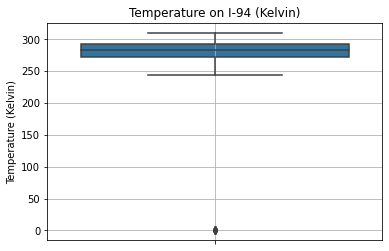

In [7]:
sns.boxplot(
    data = highway,
    y = "temp",
)

plt.title("Temperature on I-94 (Kelvin)")
plt.ylabel("Temperature (Kelvin)")
plt.grid(True)
plt.show()

Indeed, most values fall between 250 Kelvin and 300 Kelvin ($-23.15^{\circ}\text{C}$ and $26.85^{\circ}\text{C}$). The only outliers are at 0 Kelvin. This supports the idea that the zeroes are placeholders for missing values.

How many missing values are there?

In [8]:
(highway["temp"]
 .value_counts(bins = 10)
 .sort_index()
)

(-0.311, 31.007]         10
(31.007, 62.014]          0
(62.014, 93.021]          0
(93.021, 124.028]         0
(124.028, 155.035]        0
(155.035, 186.042]        0
(186.042, 217.049]        0
(217.049, 248.056]       99
(248.056, 279.063]    17372
(279.063, 310.07]     23094
Name: temp, dtype: int64

Only 10 datapoints have zero-values in `temp`. Thus, these can be dropped from the dataset.

In [9]:
highway = highway.loc[highway["temp"] != 0]

highway.shape

(40565, 9)

Now, there are 40565 rows in the dataset. Temperature outliers have been removed.

## Rain Level Outliers

Similarly, we graph a boxplot below for the `rain_1h` column.

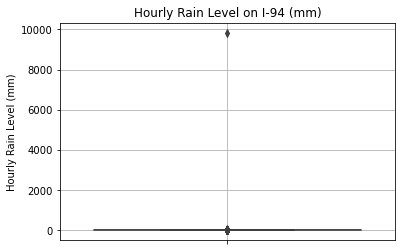

In [10]:
sns.boxplot(
    data = highway,
    y = "rain_1h",
)

plt.title("Hourly Rain Level on I-94 (mm)")
plt.ylabel("Hourly Rain Level (mm)")
plt.grid(True)
plt.show()

Most of the values are close to 0 mm, and there are only a few outliers near 10,000 mm. How many outliers are there?

In [11]:
highway["rain_1h"].value_counts(bins = 10).sort_index()

(-9.831999999999999, 983.13]    40564
(983.13, 1966.26]                   0
(1966.26, 2949.39]                  0
(2949.39, 3932.52]                  0
(3932.52, 4915.65]                  0
(4915.65, 5898.78]                  0
(5898.78, 6881.91]                  0
(6881.91, 7865.04]                  0
(7865.04, 8848.17]                  0
(8848.17, 9831.3]                   1
Name: rain_1h, dtype: int64

There is only 1 outlying datapoint. Since a 9.8 m flood level is so unrealistic given that most of the other values are small, this datapoint will be dropped.

In [12]:
highway = highway.loc[highway["rain_1h"] < 1000]

highway.shape

(40564, 9)

The dataset is left with 40564 rows.

## Traffic Volume Outliers

Below is the boxplot of traffic volume values. We want to see if the zero-values are reasonable or if these are distant outliers.

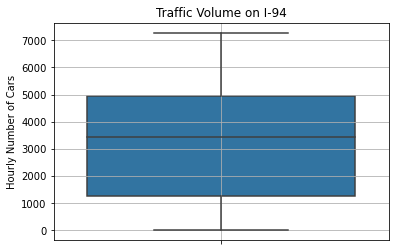

In [13]:
sns.boxplot(
    data = highway,
    y = "traffic_volume",
)

plt.title("Traffic Volume on I-94")
plt.ylabel("Hourly Number of Cars")
plt.grid(True)
plt.show()

The boxplot shows that 0 is within the approximate lower bound. It is not too distant from most of the datapoints to be considered an outlier.

Let us view a histogram to understand the distribution better.

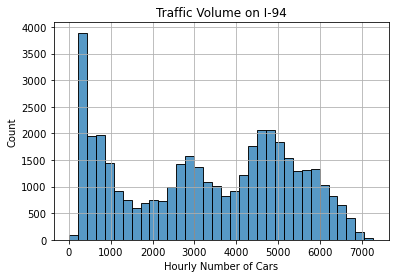

In [14]:
sns.histplot(
    data = highway,
    x = "traffic_volume",
)

plt.title("Traffic Volume on I-94")
plt.xlabel("Hourly Number of Cars")
plt.grid(True)
plt.show()

This is an unusual distribution. There appear to be 3 peaks:

- less than 1000 cars
- around 3000 cars
- around 4500 cars

It is common that less than 1000 cars pass through this I-94 station per hour. Therefore, it is likely that the 0-values are not outliers and do not need to be dropped from the dataset.

Data cleaning is done, so here are the new descriptive statistics for the dataset.

In [15]:
highway.describe(
    include = "all",
    datetime_is_numeric = True,
)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,40564,40564.000000,40564.000000,40564.000000,40564.000000,40564,40564,40564,40564.000000
unique,12,NaN,NaN,NaN,NaN,11,35,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN
freq,40511,NaN,NaN,NaN,NaN,15123,11632,NaN,NaN
mean,NaN,281.385602,0.076353,0.000117,44.209299,NaN,NaN,2015-12-24 02:14:28.937974528,3291.081402
min,NaN,243.390000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,0.000000
25%,NaN,271.850000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-03 02:45:00,1249.750000
50%,NaN,282.867500,0.000000,0.000000,40.000000,NaN,NaN,2016-06-02 19:30:00,3429.000000
75%,NaN,292.280000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-03 02:15:00,4952.000000
max,NaN,310.070000,55.630000,0.510000,100.000000,NaN,NaN,2018-09-30 23:00:00,7280.000000


Due to data cleaning, the following have changed:

- Minimum `temp` is 243.39 Kelvin
- Maximum `rain_1h` is 55.63 mm

These are more reasonable values than before.

# Exploratory Data Analysis

## Traffic Volume: Day vs. Night

At the end of the data cleaning, we noticed that there were 3 peaks (most common values) in the traffic volume data. It is possible that this can be explained by comparing traffic volume between daytime and nighttime.

In order to do this, we can make a new column `half` which labels each entry as "day" or "night." We will consider daytime to be from 6:00 AM to 6:00 PM, or 6:00 to 18:00. 

In [16]:
highway["half"] = (
    highway["date_time"]
    .dt.hour.between(6, 17) # Boolean Series where True represents day
    .replace({True: "day", False: "night"}) # Replace booleans with strings
)

highway["half"].value_counts()

night    20418
day      20146
Name: half, dtype: int64

There are 20418 nighttime entries and 20146 daytime entries.

Now we can compare the day and night histograms for traffic volume.

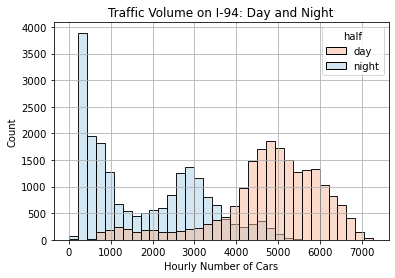

In [17]:
sns.histplot(
    data = highway,
    x = "traffic_volume",
    hue = "half",
    palette = "RdBu",
)

plt.title("Traffic Volume on I-94: Day and Night")
plt.xlabel("Hourly Number of Cars")
plt.grid(True)
plt.show()

The histogram above shows that:

- In the nighttime, the traffic volume is commonly under 1000 or around 3000.
- In the daytime, the traffic volume is commonly around 5000.

Therefore, **traffic is generally heavier in the daytime**, between 6:00 AM and 6:00 PM.

Since we want to determine what influences heavy traffic, it would be best to focus our analysis on the daytime entries. Thus, such entries will be put in a separate DataFrame called `daytime`.

In [18]:
daytime = (
    highway
    .loc[highway["half"] == "day"]
    .drop(columns = "half")
)

daytime.describe(
    include = "all",
    datetime_is_numeric = True,
)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
count,20146,20146.000000,20146.000000,20146.000000,20146.000000,20146,20146,20146,20146.000000
unique,1,NaN,NaN,NaN,NaN,10,33,NaN,NaN
top,None,NaN,NaN,NaN,NaN,Clouds,sky is clear,NaN,NaN
freq,20146,NaN,NaN,NaN,NaN,8360,4971,NaN,NaN
mean,NaN,282.018771,0.076210,0.000124,47.342500,NaN,NaN,2015-12-26 11:32:49.582050816,4784.630100
min,NaN,243.390000,0.000000,0.000000,0.000000,NaN,NaN,2012-10-02 09:00:00,1.000000
25%,NaN,272.220000,0.000000,0.000000,1.000000,NaN,NaN,2014-02-04 08:15:00,4311.000000
50%,NaN,283.640000,0.000000,0.000000,40.000000,NaN,NaN,2016-06-07 11:30:00,4943.000000
75%,NaN,293.370000,0.000000,0.000000,90.000000,NaN,NaN,2017-08-06 09:45:00,5678.000000
max,NaN,310.070000,44.450000,0.510000,100.000000,NaN,NaN,2018-09-30 17:00:00,7280.000000


This DataFrame contains only 20146 rows. The descriptive statistics are naturally somewhat different from before.

## Effect of Units of Time

It is possible that traffic volume is influenced by certain units of time. For example, it could be influenced by the month, the day of the week, or the hour of the day. In this section, we investigate these factors.

### By Month

First, does the month affect the traffic volume?

Let us make a new column that indicates the month as a number.

In [19]:
daytime["month"] = daytime["date_time"].dt.month

daytime["month"]

0        10
1        10
2        10
3        10
4        10
         ..
48191     9
48192     9
48194     9
48196     9
48197     9
Name: month, Length: 20146, dtype: int64

Then, we can calculate and graph the average traffic volume per month. The median will be used instead of the mean since the data are not normally distributed.

Table:

In [20]:
(daytime
 .groupby("month")
 .median()
 [["traffic_volume"]]
)

,traffic_volume
month,
1,4651.5
2,4886.0
3,5062.0
4,5105.0
5,5052.0
6,5050.0
7,4799.5
8,5056.0
9,4925.5


Line chart:

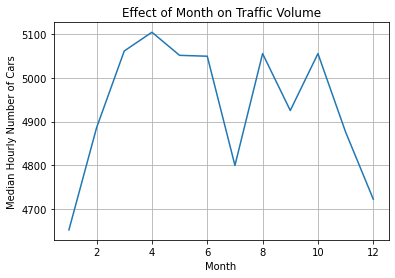

In [21]:
sns.lineplot(
    data = daytime,
    x = "month",
    y = "traffic_volume",
    estimator = np.median,
    ci = None,
)

plt.title("Effect of Month on Traffic Volume")
plt.xlabel("Month"),
plt.ylabel("Median Hourly Number of Cars")
plt.grid(True)
plt.show()

The line chart shows that the median traffic volume is highest in April, possibly because this is in spring. Traffic volume is lowest in January and December since these are in the middle of winter. July also has less traffic since it is in the middle of summer.

### By Day of the Week

Next, we will investigate the effect of the day of the week on the traffic volume.

In [22]:
daytime["day"] = daytime["date_time"].dt.dayofweek

(daytime
 .groupby("day")
 .median()
 [["traffic_volume"]]
)

,traffic_volume
day,
0,4971.5
1,5268.0
2,5355.0
3,5404.0
4,5399.0
5,4194.0
6,3737.0


Note that 0 means Monday and 6 means Sunday.

The corresponding line chart is shown below.

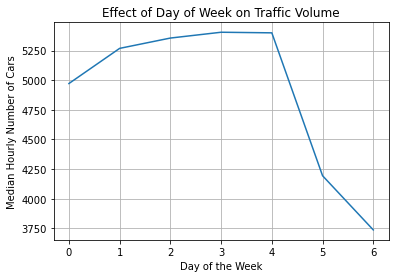

In [23]:
sns.lineplot(
    data = daytime,
    x = "day",
    y = "traffic_volume",
    estimator = np.median,
    ci = None,
)

plt.title("Effect of Day of Week on Traffic Volume")
plt.xlabel("Day of the Week"),
plt.ylabel("Median Hourly Number of Cars")
plt.grid(True)
plt.show()

The line chart shows that the traffic volume is very high from Monday to Friday, then dips by 1000 cars on Saturday and Sunday. It makes sense that traffic is **heavier on weekdays** and lighter on weekends.

### By Hour of the Day

Lastly, we will investigate the effect of the time of day on the traffic volume. Since we have narrowed the dataset down to daytime entries, only hours from 6:00 AM to 6:00 PM are included.

First, though, let's make a column that indicates weekdays and weekends so that we can compare them.

In [24]:
daytime["day_type"] = daytime["day"].replace({
    0: "business day",
    1: "business day",
    2: "business day",
    3: "business day",
    4: "business day",
    5: "weekend",
    6: "weekend",
})

Next, below is the table of median traffic volume grouped by the day of the week and the type of day.

In [25]:
daytime["hour"] = daytime["date_time"].dt.hour

(daytime
 .groupby(["hour", "day_type"])
 .median()
 [["traffic_volume"]]
)

traffic_volume
hour day_type                    
6    business day          5588.0
     weekend               1092.0
7    business day          6320.5
     weekend               1547.0
8    business day          5751.0
     weekend               2268.0
9    business day          5053.0
     weekend               3147.0
10   business day          4484.5
     weekend               3722.0
11   business day          4714.0
     weekend               4114.0
12   business day          4921.0
     weekend               4442.5
13   business day          4919.5
     weekend               4457.0
14   business day          5232.0
     weekend               4457.0
15   business day          5740.0
     weekend               4421.0
16   business day          6403.5
     weekend               4438.0
17   business day          5987.0
     weekend               4261.5

The hours are in 24-hour time; 17:00 represents the hour from 5:00 PM to 6:00 PM.

In order to understand this table better, we can visualize it in the line chart below.

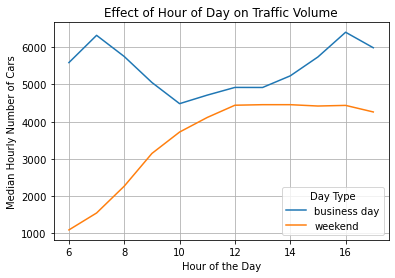

In [26]:
sns.lineplot(
    data = daytime,
    x = "hour",
    y = "traffic_volume",
    hue = "day_type",
    estimator = np.median,
    ci = None,
)

plt.title("Effect of Hour of Day on Traffic Volume")
plt.xlabel("Hour of the Day"),
plt.ylabel("Median Hourly Number of Cars")
plt.legend(title = "Day Type")
plt.grid(True)
plt.show()

On business days, traffic is heaviest at 7:00 AM and 4:00 PM. These are the times when people travel to or from work. Traffic is lightest around noontime.

On weekends, traffic volume increases from 6:00 AM to 12:00 PM and plateaus from there on. People are free to travel at any time on weekends since most don't have work. However, the number of cars is still lower on weekends compared to business days.

## Effect of Weather

Up until now, we have investigated the possible effects of different units of time on the traffic volume. In this section, we focus on how traffic is affected by the **weather**.

The following are the weather-related columns in the dataset:

- `temp`
- `rain_1h`
- `snow_1h`
- `clouds_all`
- `weather_main`
- `weather_description`

The first 4 are numerical and the last 2 are categorical.

### Numerical Weather Columns

Let us inspect the Pearson's correlation coefficient between traffic volume and each of the numerical weather columns.

In [27]:
daytime.corr().loc[
    ["temp", "rain_1h", "snow_1h", "clouds_all"],
    ["traffic_volume"]
]

,traffic_volume
temp,0.124311
rain_1h,-0.022817
snow_1h,-0.004145
clouds_all,0.000621


All 4 numerical weather columns appear to have very weak correlations with traffic volume.

The highest correlation involves temperature, but the coefficient is only 12.43. This indicates a weak positive relationship. As temperature increases, traffic volume also increases, but not consistently.

We can understand the correlation better using a scatter plot.

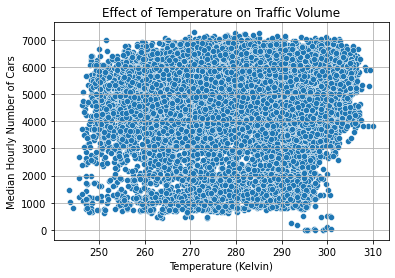

In [28]:
sns.scatterplot(
    data = daytime,
    x = "temp",
    y = "traffic_volume",
    ci = None,
)

plt.title("Effect of Temperature on Traffic Volume")
plt.xlabel("Temperature (Kelvin)"),
plt.ylabel("Median Hourly Number of Cars")
plt.grid(True)
plt.show()

Unfortunately, the datapoints are scattered quite consistently throughout all combinations of temperature and traffic volume. The correlation is weak; temperature is not a reliable indicator of traffic. Neither are the other numerical weather columns, since their coefficients were even weaker. 

### Categorical Weather Columns

Next, we'll see if the categorical weather columns can serve as better indicators of heavy traffic.

#### Short Descriptions of Weather

The `weather_main` column contains short, 1-word descriptions of the weather.

What are the categories under `weather_main`?

In [29]:
daytime["weather_main"].value_counts()

Clouds          8360
Clear           5821
Rain            2392
Mist            1441
Snow            1165
Haze             472
Drizzle          223
Thunderstorm     175
Fog               90
Smoke              7
Name: weather_main, dtype: int64

Clouds, Clear, and Rain are the most frequent descriptions of the weather.

Next, let us investigate the effect of the weather description on the traffic volume. The table is shown below.

In [30]:
(daytime
 .groupby("weather_main")
 .median()
 [["traffic_volume"]]
)

,traffic_volume
weather_main,
Clear,4936.0
Clouds,4974.5
Drizzle,5132.0
Fog,5588.0
Haze,4817.5
Mist,5053.0
Rain,4975.0
Smoke,4085.0
Snow,4570.0


This is visualized in the bar plot below.

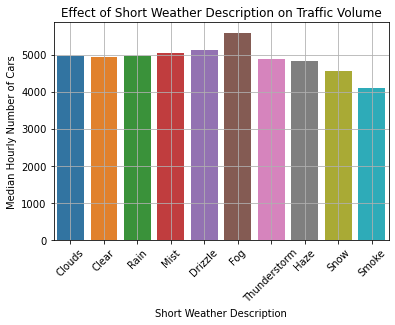

In [31]:
sns.barplot(
    data = daytime,
    x = "weather_main",
    y = "traffic_volume",
    estimator = np.median,
    ci = None,
)

plt.title("Effect of Short Weather Description on Traffic Volume")
plt.xlabel("Short Weather Description"),
plt.ylabel("Median Hourly Number of Cars")
plt.xticks(rotation = 45)
plt.grid(True)
plt.show()

The traffic volume appears to be mostly consistent across short weather descriptions. Notably:

- Traffic is heaviest during fog (5588 cars).
- Traffic is lightest when there is smoke (4085 cars).

However, the effects are quite small, reaching only up to a difference of 1000 cars.

#### Long Descriptions of Weather

The `weather_description` column contains longer descriptions of the weather.

Below are its categories.

In [32]:
daytime["weather_description"].value_counts()

sky is clear                           4971
broken clouds                          2683
overcast clouds                        2526
scattered clouds                       2068
mist                                   1441
light rain                             1415
few clouds                             1083
Sky is Clear                            850
light snow                              811
moderate rain                           666
haze                                    472
heavy snow                              249
heavy intensity rain                    207
light intensity drizzle                 160
proximity thunderstorm                  136
snow                                     90
fog                                      90
proximity shower rain                    89
drizzle                                  57
thunderstorm                             22
light shower snow                        11
light intensity shower rain               7
smoke                           

Notice that there is a `sky is clear` value and a `Sky is Clear` value with different capitalization. It is likely that these two categories mean the same thing, so let us combine them.

In [33]:
daytime["weather_description"].replace(
    {"Sky is Clear": "sky is clear"},
    inplace = True,
)

daytime["weather_description"].value_counts().head()

sky is clear        5821
broken clouds       2683
overcast clouds     2526
scattered clouds    2068
mist                1441
Name: weather_description, dtype: int64

The `sky is clear` category now has 5821 entries.

Now that that's cleaned, let's make a table showing the effect of the long weather description on the traffic volume.

In [34]:
(daytime
 .groupby("weather_description")
 .median()
 [["traffic_volume"]]
)

,traffic_volume
weather_description,
broken clouds,4925.0
drizzle,5132.0
few clouds,4977.0
fog,5588.0
freezing rain,4762.0
haze,4817.5
heavy intensity drizzle,5824.5
heavy intensity rain,4922.0
heavy snow,4673.0


The table is visualized in the bar graph below.

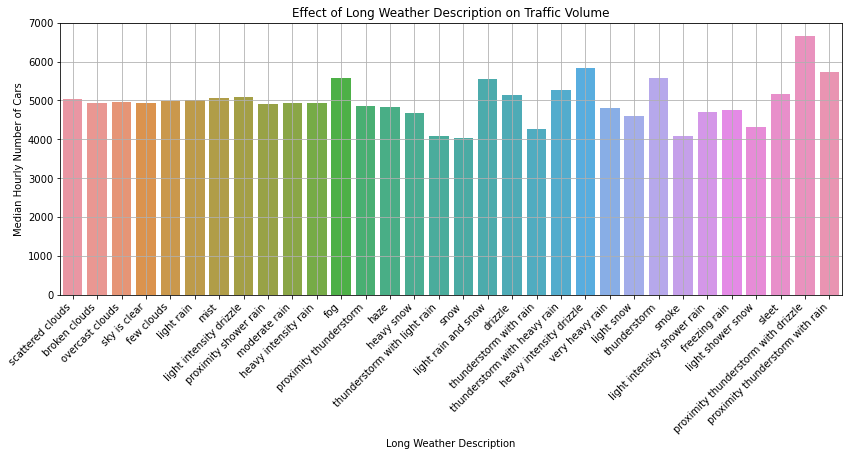

In [35]:
plt.figure(figsize = (14, 5))

sns.barplot(
    data = daytime,
    x = "weather_description",
    y = "traffic_volume",
    estimator = np.median,
    ci = None,
)

plt.title("Effect of Long Weather Description on Traffic Volume")
plt.xlabel("Long Weather Description"),
plt.ylabel("Median Hourly Number of Cars")
plt.xticks(rotation = 45, ha = "right")
plt.grid(True)
plt.show()

Similar to the bar graph of short weather descriptions, most of the values are around 5000 cars. Notably:

- Traffic is heaviest in a proximity thunderstorm with drizzle (6667 cars).
    - The word "proximity" was likely used to emphasize that the storm was very close to the station.
    - It makes sense that a drizzling thunderstorm directly over the highway would reduce visibility and make traffic pile up.
- Traffic is lightest in snow (4032 cars).
    - It is likely that more people choose not to travel outside when it is snowing.

# Conclusion

This project aimed to determine reliable indicators of heavy traffic along the I-94 highway. Data were narrowed down to daytime (as opposed to nighttime) entries, which have higher traffic volumes. Exploratory data analysis was conducted using mostly Seaborn visualizations.

The following conclusions were drawn:

- Time has various effects on traffic volume. Traffic is **heavier** when:
    - It is daytime (between 6:00 AM and 6:00 PM).
    - The month is from March to June.
    - The day is a business day, as opposed to a weekend.
    - The hour is 7:00 AM or 4:00 PM on a business day.
    
<br/>

- Weather affects traffic volume to a lesser extent. Traffic is **heavier** when:
    - There is fog on the road (or other visual obstructions).
    - There is a nearby thunderstorm with drizzle or rain.
    
<br/>
    
Thanks for reading!